In [1]:
import numpy as np
from matplotlib import pyplot as plt

Série de Fourier para t

In [2]:
def a0(L, d, c):
    return (d**2-c**2)*L/2

In [3]:
def an(c,d,n,L):
    s1 = n * np.pi*d
    s2 = n * np.pi*c
    a1 = (L/(np.pi**2*n**2))*(s1*np.sin(s1) + np.cos(s1))
    a2 = (L/(np.pi**2*n**2))*(s2*np.sin(s2) + np.cos(s2))
    return a1-a2

In [4]:
def bn(c,d,n,L):
    s1 = n * np.pi*d
    s2 = n * np.pi*c
    a1 = L/(np.pi**2*n**2)*(-s1*np.cos(s1) + np.sin(s1))
    a2 = L/(np.pi**2*n**2)*(-s2*np.cos(s2) + np.sin(s2))
    return a1-a2

In [5]:
def funa(c,d,n,L,t):
    return an(c,d,n,L)*np.cos(n*np.pi*t/L)

In [6]:
def funb(c,d,n,L,t):
    return bn(c,d,n,L)*np.sin(n*np.pi*t/L)

In [7]:
ns = np.arange(1,10)
c = 0
d = 1
L = np.pi
t = 0

In [8]:
def suma(c,d,ns,L,t):
    return np.vectorize(lambda n:funa(c,d,n,L,t))(ns).sum()

In [9]:
def sumb(c,d,ns,L,t):
    return np.vectorize(lambda n:funb(c,d,n,L,t))(ns).sum()

In [10]:
def fun(c,d,n,L,t):
    ns = np.arange(1,n)
    a = a0(L,d,c)
    return suma(c,d,ns,L,t) + sumb(c,d,ns,L,t) + a/2

In [11]:
fun(c,d,50,L,8)

1.7142954563361898

In [12]:
ts = np.arange(-3*np.pi,3*np.pi,0.01)

In [13]:
def actual(c,d,L,t):
    myt = np.mod(t,2*np.pi) 
    if myt < np.pi:
        return myt
    else:
        return 0.

In [14]:
truths = np.vectorize(lambda thist: actual(c,d,L,thist))(ts)

In [31]:
func = np.vectorize(lambda thist: fun(c,d,200,L,thist))(ts)

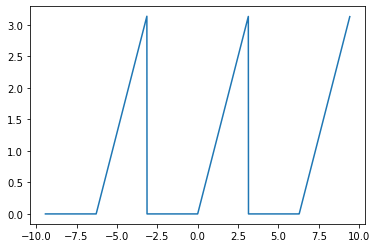

In [20]:

plt.plot(ts,truths)

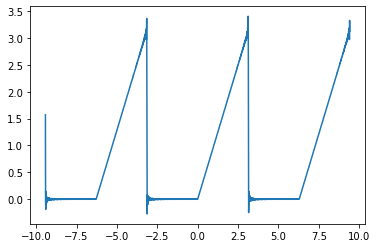

In [32]:
plt.plot(ts,func)
